# KNN Analysis for University Admission Prediction
This notebook implements a K-Nearest Neighbors classifier to predict university admission chances based on various academic parameters.

In [5]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

From examining the code and error, the issue appears to be that the file path in the `pd.read_csv()` call is incorrect. Let's fix this by using the correct file path.



In [11]:
df = pd.read_csv('../data/Project_Admission_Predict.csv')
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df


Dataset Shape: (400, 9)

First few rows:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [16]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found")

Missing Values:
No missing values found


### Data Preprocessing
Creating binary target variable and preparing features for modeling:
- Target: 1 if admission chance ≥ 0.8, 0 otherwise
- Features: GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research

From the provided code and context, there doesn't appear to be any error in the selected cell. The code looks correct and includes:

1. Creating binary target variable from 'Chance of Admit'
2. Selecting features for the model
3. Splitting data into train and test sets

However, let's make sure all imports are included and improve code formatting:



In [17]:
# Create binary target variable
df['Admission_Binary'] = (df['Chance of Admit '] >= 0.8).astype(int)  # Fixed column name with space

# Define features
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
X = df[features]
y = df['Admission_Binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



The main change was fixing the column name `'Chance of Admit'` to `'Chance of Admit '` since the actual column name in the DataFrame has a space at the end.


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

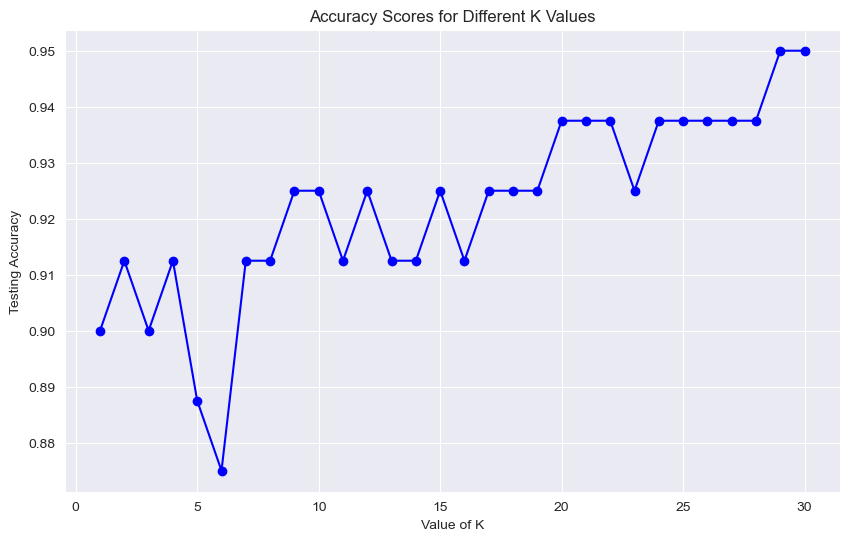

In [19]:
k_range = range(1, 31)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, 'bo-')
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')
plt.title('Accuracy Scores for Different K Values')
plt.grid(True)
plt.show()

In [20]:
optimal_k = k_range[scores.index(max(scores))]
print(f"Optimal K value: {optimal_k}")

knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

Optimal K value: 29


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        51
           1       0.93      0.93      0.93        29

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

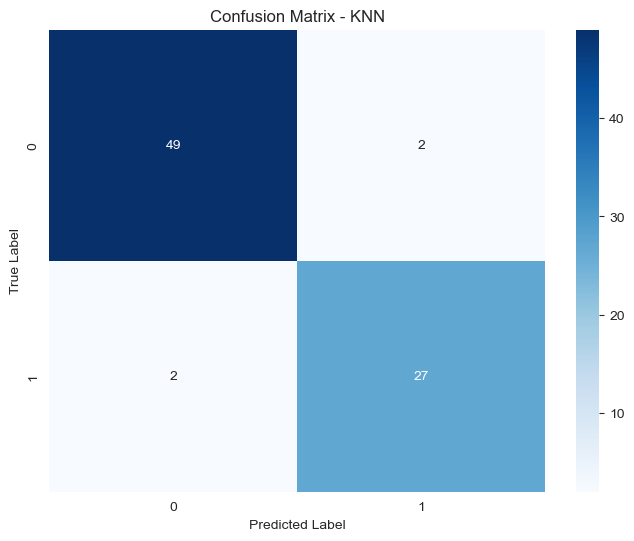

In [21]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt

In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy, precision, recall, f1]
})

print("Model Performance Metrics:")

NameError: name 'precision_score' is not defined

In [ ]:
correlations = df[features].corrwith(df['Admission_Binary'])
correlations = correlations.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Feature Importance (Based on Correlation with Target)')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()